<a href="https://colab.research.google.com/github/Sitaras/Artificial-Intelligence/blob/final/ai2_hw1_sdi1800178.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence II - Homework 1
---
###Δημήτριος Σιταράς | 1115201800178
---

In [ ]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import string

In [ ]:
!pip install tweet-preprocessor

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για την προεπεξεργασία/καθάρισμα των δεδομένων (δηλαδή των tweets) και συγκεκριμένα:



*   Η συνάρτηση cleaning(...) χρησιμοποιείται για τον καθαρισμό των urls και των mentions απο τα tweets (γι'αυτό τον σκοπό εγκαθιστώ και χρησιμοποιώ τον tweet-preprocessor). Επίσης, μέσω της συνάρτησης αυτής αφαιρώ από τα tweets τα emojis, τα σημεία στίξης και οποιαδήποτε σύμβολα.
*    Η συνάρτηση stemming(...) χρησιμοποιείται για να μειώσει την κλίση των λέξεων του κάθε tweet στην ρίζα ή την βάση τους. Γι'αυτό τον σκοπό χρησιμοποιώ τον SnowBallStemmer.
*    Η συνάρτηση lemmatization(...) χρησιμοποιείται για την "ομαδοποίηση" των λέξεων του κάθε tweet στo λήμμα τους, ώστε να μπορούν να αναλυθούν ως ένα ενιαίο στοιχείο.



In [ ]:
import string
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import preprocessor as p
nltk.download('wordnet')

def cleaning(text):
    # used to clean urls, mentions (with @), emojis, punctuation marks and all the other symbols that exist
    p.set_options(p.OPT.URL,p.OPT.MENTION)
    text = p.clean(text)
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())

def stemming(text):
    # used to reduce the inflection in words to their root 
    # SnowBallStemmer used for this job
    SnowStemmer = SnowballStemmer("english")
    stemmedΤokens = [SnowStemmer.stem(token) for token in text.split()]
    return ' '.join(stemmedΤokens)

def lemmatization(text):
    # used to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma
    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    stringList = [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
    return ' '.join([str(element) for element in stringList])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Αρχικά, διαβάζω τα 2 αρχεία vaccine_train_set.csv και vaccine_validation_set.csv ( το αρχείο vaccine_validation_set.csv ειναι αυτό που θα αντικατασταθεί από το vaccine_test_set.csv ) δημιουργώντας τα αντίστοιχα dataframes. Στην συνέχεια παίρνω από το κάθε ένα την στήλη tweet και την στήλη label (σε μορφή λίστας) έτσι ώστε να δημιουργηθούν τα αντίστοιχα σύνολα.

In [ ]:
Location = r'vaccine_train_set.csv'
trainDf=pd.read_csv(Location)
Location = r'vaccine_validation_set.csv' # replace this one with the path of the test set
validationDf=pd.read_csv(Location)

Έτσι, λοιπόν, από τα 2 παραπάνω data frames, έχω τα εξής:


*   σύνολα που ΔΕΝ έχουν δεχθεί έπεξεργασία ως προς τα tweets. Αποτελoύνται απο τις λίστες: tweetsTrain, labelsTrain, tweetsVal, labelsVal.
*   σύνολα που έχουν δεχθεί έπεξεργασία ως προς τα tweets (δηλαδή την εφαρμογή των παραπάνω συναρτήσεων: cleaning, stemming, lemmatization). Αποτελoύνται απο τις λίστες: tweetsTrainPreprocessing, labelsTrain, tweetsValPreprocessing, labelsVal.

Τελικά, κατασκευάζω 2 διαφορετικα train sets (και επομένως 2 διαφορετικά validation sets).



In [ ]:
# without preprocessing 
tweetsVal=list(validationDf['tweet'])
labelsVal=list(validationDf['label'])

In [ ]:
# without preprocessing 
tweetsTrain=list(trainDf['tweet'])
labelsTrain=list(trainDf['label'])

print(tweetsTrain)

['Sip N Shop Come thru right now #Marjais #PopularNobodies #MMR 🙌🙌🙌🙌 @ Marjais SipNShop http://t.co/JfWAH7uzWE', "I don't know about you but My family and I will not take the #Covid19 vaccine anytime soon...", "@MSignorile Immunizations should be mandatory. Period. In Oklahoma, they won't let kids go to school without them. It's dangerous otherwise!", 'President Obama spoke in favor of vaccination for children. Fox will start telling its viewers to "choose" against vaccination in 3,2,1...', '"@myfoxla: Arizona monitoring hundreds for measles linked to Disneyland http://t.co/tEoU2zAQat" It\'s a Small World After All.', "Why did I get my whooping cough vaccine the same day I bring my baby home? I can't even lift my 5lb dog with that arm! #imweak", 'Prosecutor Ken Ervin: I want to know how recklessly killing an individual fell under the scope of his federal immunity.', '"@UberFacts: On average, people who complain live longer -- Releasing this tension increases immunity &amp; boosts their

In [ ]:
# with preprocessing 
trainDf['tweet'] = trainDf['tweet'].apply(cleaning)
trainDf['tweet'] = trainDf['tweet'].apply(lemmatization)
trainDf['tweet'] = trainDf['tweet'].apply(stemming)

validationDf['tweet'] = validationDf['tweet'].apply(cleaning)
validationDf['tweet'] = validationDf['tweet'].apply(lemmatization)
validationDf['tweet'] = validationDf['tweet'].apply(stemming)

tweetsTrainPreprocessing=list(trainDf['tweet'])
tweetsValPreprocessing=list(validationDf['tweet'])

print(tweetsTrainPreprocessing)

['sip n shop come thru right now marjai popularnobodi mmr marjai sipnshop', 'i dont know about you but my famili and i will not take the covid19 vaccin anytim soon', 'immun should be mandatori period in oklahoma they wont let kid go to school without them it danger otherwis', 'presid obama spoke in favor of vaccin for child fox will start tell it viewer to choos against vaccin in 321', 'arizona monitor hundr for measl link to disneyland it a small world after all', 'whi did i get my whoop cough vaccin the same day i bring my babi home i cant even lift my 5lb dog with that arm imweak', 'prosecutor ken ervin i want to know how reckless kill an individu fell under the scope of his feder immun', 'on averag peopl who complain live longer releas this tension increas immun amp boost their healthreason i do', 'the legaci of will be she took her cloth off for and contribut to get kid kill vaccinateyourkid', 'on averag peopl who complain live longer releas this tension increas immun and boost th

Κατασκευάζω τους αντίστοιχους πίνακες BagOfWords, Tf-idf και Hashing των 2 διαφορετικών train sets που έχω (δηλαδή για το tweetsTrain και το tweetsTrainPreprocessing).

In [ ]:
# BoW - without preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
bowVectorizer = CountVectorizer(max_df=0.95, min_df=0.0025,ngram_range=(1,2)) # initialize the unigram CountVectorizer
bowTrain = bowVectorizer.fit_transform(tweetsTrain)  # run the vectorizer for all the tweets without Preprocessing

In [ ]:
# BoW - with preprocessing 
bowVectorizerPreprocessing = CountVectorizer(max_df=0.95, min_df=0.0025,ngram_range=(1,2)) # initialize the unigram CountVectorizer
bowTrainPreprocessing = bowVectorizerPreprocessing.fit_transform(tweetsTrainPreprocessing)  # run the vectorizer for all the tweets with Preprocessing

In [ ]:
# Tf-idf - without preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(max_df=0.95, min_df=0.0026, ngram_range=(1,2)) #initialize the TfidfVectorizer
tfidfTrain = tfidfVectorizer.fit_transform(tweetsTrain)  # run the vectorizer for all the tweets without Preprocessing

In [ ]:
# Tf-idf - with preprocessing 
tfidfVectorizerPreprocessing = TfidfVectorizer(max_df=0.95, min_df=0.0026, ngram_range=(1,2)) #initialize the TfidfVectorizer
tfidfTrainPreprocessing = tfidfVectorizerPreprocessing.fit_transform(tweetsTrainPreprocessing)  # run the vectorizer for all the tweets with Preprocessing

In [ ]:
# Hashing - without preprocessing 
from sklearn.feature_extraction.text import HashingVectorizer
hashingVectorizer = HashingVectorizer(n_features=2**10,ngram_range=(1,2)) #initialize the HashingVectorizer
hashingTrain = hashingVectorizer.fit_transform(tweetsTrain)  # run the vectorizer for all the tweets without Preprocessing

In [ ]:
# Hashing - with preprocessing 
hashingVectorizerPreprocessing = HashingVectorizer(n_features=2**10,ngram_range=(1,2)) #initialize the HashingVectorizer
hashingTrainPreprocessing = hashingVectorizerPreprocessing.fit_transform(tweetsTrainPreprocessing)  # run the vectorizer for all the tweets with Preprocessing

Δημιουργώ 2 ίδιους Softmax Classifiers ώστε να τους εφαρμόσω ξεχωριστά στα 2 διαφορετικά train sets.

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class="multinomial",solver="newton-cg", max_iter=1000, C=10.0) 
softmaxPreprocessingx = LogisticRegression(multi_class="multinomial",solver="newton-cg", max_iter=1000, C=10.0) 

## Classification χρησιμοποιώντας BoW
--------------------------------------

Μετατρέπω (transform) το validation set (tweetsVal) σε BoW αναπαράσταση χρησιμοποιώντας τον CountVectorizer με τον οποίο παράχθηκε η bow αναπαράσταση του αντίστοιχου train set (tweetsTrain). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Στην συνέχεια, κάνω train (fit) τον classifier με τον πίνακα BoW, που προέκυψε από τo tweetsTrain, με το labelsTrain. Το αντίστοιχο κάνω μετά με το δεύτερο classifier, με τον δεύτερο πίνακα BoW, που προέκυψε από τo tweetsTrainPreprocessing, με το labelsTrain. 

Έπειτα, καλώ την predict δίνοντας σαν όρισμα το validation set (tweetsVal) σε BoW αναπαράσταση (bowTest). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Τέλος, κάθε classifier επιστρέφει μια λίστα με τις "προβλέψεις" για το αν τα tweets του αντίστοιχου validation set είναι 0 (neutral), 1 (anti-vax) ή 2 (pro-vax). Αποθηκέυω την λίστα αυτή έτσι ώστε να αξιολογήσω τον μοντέλο, υπολογίζοντας: accurary, recision, recall, f1-score, support.

In [ ]:
# without preprocessing 
bowTest = bowVectorizer.transform(tweetsVal)
softmax.fit(bowTrain,labelsTrain)
softmaxBowPredictedLabel=softmax.predict(bowTest)

In [ ]:
# with preprocessing
bowTestPreprocessing = bowVectorizerPreprocessing.transform(tweetsValPreprocessing)
softmaxPreprocessing.fit(bowTrainPreprocessing,labelsTrain)
softmaxBowPredictedLabelPreprocessing=softmaxPreprocessing.predict(bowTestPreprocessing)

## Classification χρησιμοποιώντας Tf-Idf
--------------------------------------

Μετατρέπω (transform) το validation set (tweetsVal) σε Tf-Idf αναπαράσταση χρησιμοποιώντας τον TfidfVectorizer με τον οποίο παράχθηκε η Tf-Idf αναπαράσταση του αντίστοιχου train set (tweetsTrain). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Στην συνέχεια, κάνω train (fit) τον classifier με τον πίνακα Tf-Idf, που προέκυψε από το tweetsTrain, με το labelsTrain. Το αντίστοιχο κάνω μετά με το δεύτερο classifier με τον δεύτερο πίνακα Tf-Idf, που προέκυψε από το tweetsTrainPreprocessing, με το labelsTrain. 

Έπειτα, καλώ την predict δίνοντας σαν όρισμα το validation set (tweetsVal) σε Tf-Idf αναπαράσταση (tfidfTest). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Τέλος, κάθε classifier επιστρέφει μια λίστα με τις "προβλέψεις" για το αν τα tweets του αντίστοιχου validation set είναι 0 (neutral), 1 (anti-vax) ή 2 (pro-vax). Αποθηκέυω την λίστα αυτή έτσι ώστε να αξιολογήσω τον μοντέλο, υπολογίζοντας: accurary, recision, recall, f1-score, support.


In [ ]:
# without preprocessing 
tfidfTest = tfidfVectorizer.transform(tweetsVal)
softmax.fit(tfidfTrain,labelsTrain)
softmaxTfidfPredictedLabel = softmax.predict(tfidfTest)

In [ ]:
# with preprocessing
tfidfTestPreprocessing = tfidfVectorizerPreprocessing.transform(tweetsValPreprocessing)
softmaxPreprocessing.fit(tfidfTrainPreprocessing,labelsTrain)
softmaxTfidfPredictedLabelPreprocessing = softmaxPreprocessing.predict(tfidfTestPreprocessing)

## Classification χρησιμοποιώντας Hashing
--------------------------------------

Μετατρέπω (transform) το validation set (tweetsVal) σε Hashing αναπαράσταση χρησιμοποιώντας τον HashingVectorizer με τον οποίο παράχθηκε η Hashing αναπαράσταση του αντίστοιχου train set (tweetsTrain). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Στην συνέχεια, κάνω train (fit) τον classifier με τον πίνακα Hashing, που προέκυψε από τα tweetsTrain, με το labelsTrain. Το αντίστοιχο κάνω μετά με το δεύτερο classifier με τον δεύτερο πίνακα Tf-Idf, που προέκυψε από το tweetsTrainPreprocessing, με το labelsTrain. 

Έπειτα, καλώ την predict δίνοντας σαν όρισμα το validation set (tweetsVal) σε Hashing αναπαράσταση (hashingTest). Το αντίστοιχο κάνω μετά για το "δεύτερο" validation set (δηλαδή για το tweetsValPreprocessing).

Τέλος, κάθε classifier επιστρέφει μια λίστα με τις "προβλέψεις" για το αν τα tweets του αντίστοιχου validation set είναι 0 (neutral), 1 (anti-vax) ή 2 (pro-vax). Αποθηκέυω την λίστα αυτή έτσι ώστε να αξιολογήσω τον μοντέλο, υπολογίζοντας: accurary, recision, recall, f1-score, support.

In [ ]:
# without preprocessing 
hashingTest = hashingVectorizer.transform(tweetsVal)
softmax.fit(hashingTrain,labelsTrain)
softmaxHashingPredictedLabel = softmax.predict(hashingTest)

In [ ]:
# with preprocessing
hashingTestPreprocessing = hashingVectorizerPreprocessing.transform(tweetsValPreprocessing)
softmaxPreprocessing.fit(hashingTrainPreprocessing,labelsTrain)
softmaxHashingPredictedLabelPreprocessing = softmaxPreprocessing.predict(hashingTestPreprocessing)

## Αποτελέσματα - Accuracy, Precision, Recall, F1-Score, Support, Learning Curves
--------------------------------------

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

def learningCurve(model,trainX,validationX,trainY,validationY,vectMethod):
    # function that plots the corresponding learning curve for the given model
    trainF1Scores=[]
    validationF1Scores=[]
    featuresSizes = (np.linspace(0.1, 1.0, 20)*(trainX.shape[0])).astype(int) # a list with the sizes of the features that used each time to train the corresponding model
    for size in featuresSizes:
        model.fit(trainX[:size],trainY[:size]) # train the model 
        trainF1 = f1_score(trainY[:size],model.predict(trainX[:size]),average='weighted') # find the corresponding f1 score for the train set
        validationF1 = f1_score(validationY,model.predict(validationX),average='weighted') # find the corresponding f1 score for the validation (or test) set
        trainF1Scores.append(trainF1)
        validationF1Scores.append(validationF1)

    plt.grid()
    plt.plot(featuresSizes,trainF1Scores,'o-', color="r")
    plt.plot(featuresSizes,validationF1Scores,'o-', color="g")
    plt.legend(['Training Score','Validation Score'])
    plt.xlabel('Features Size')
    plt.ylabel('F1 score')
    plt.title('Learning Curve - ' + vectMethod + " Vectorizer" )
    plt.show()
  



### Bag Of Words
--------------------------------------

In [ ]:
# without preprocessing 
softmaxBowAccuracy = accuracy_score(labelsVal,softmaxBowPredictedLabel)
print(" Softmax accuracy BOW: %.2f%%" %(softmaxBowAccuracy*100))
print()
print(classification_report(labelsVal,softmaxBowPredictedLabel))

 Softmax accuracy BOW: 70.46%

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1065
           1       0.56      0.43      0.49       296
           2       0.68      0.70      0.69       921

    accuracy                           0.70      2282
   macro avg       0.67      0.64      0.65      2282
weighted avg       0.70      0.70      0.70      2282



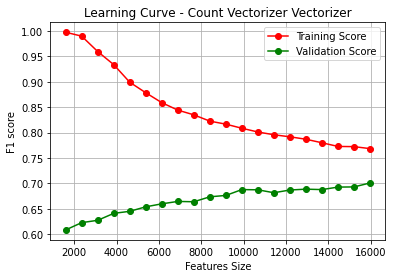

In [ ]:
learningCurve(softmax,bowTrain,bowTest,labelsTrain,labelsVal,"Count Vectorizer")

In [ ]:
# with preprocessing 
softmaxBowAccuracyPreprocessing = accuracy_score(labelsVal,softmaxBowPredictedLabelPreprocessing)
print("-> With Preprocessing:")
print()
print(" Softmax accuracy BOW: %.2f%%" %(softmaxBowAccuracyPreprocessing*100))
print(classification_report(labelsVal,softmaxBowPredictedLabelPreprocessing))


-> With Preprocessing:

 Softmax accuracy BOW: 69.11%
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1065
           1       0.54      0.42      0.47       296
           2       0.68      0.68      0.68       921

    accuracy                           0.69      2282
   macro avg       0.65      0.63      0.64      2282
weighted avg       0.69      0.69      0.69      2282



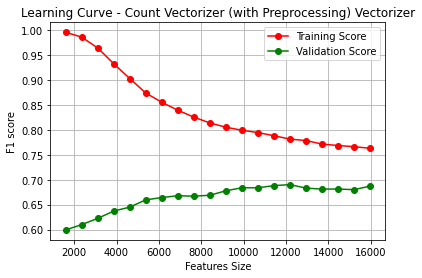

In [ ]:
learningCurve(softmax,bowTrainPreprocessing,bowTestPreprocessing,labelsTrain,labelsVal,"Count Vectorizer (with Preprocessing)")

### Tf-idf
--------------------------------------

In [ ]:
# without preprocessing
softmaxTfidfAccuracy = accuracy_score(labelsVal,softmaxTfidfPredictedLabel)
print(" Softmax accuracy Tdidf: %.2f%%" %(softmaxTfidfAccuracy*100))
print()
print(classification_report(labelsVal,softmaxTfidfPredictedLabel))

 Softmax accuracy Tdidf: 71.12%

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1065
           1       0.60      0.44      0.51       296
           2       0.68      0.72      0.70       921

    accuracy                           0.71      2282
   macro avg       0.68      0.65      0.66      2282
weighted avg       0.71      0.71      0.71      2282



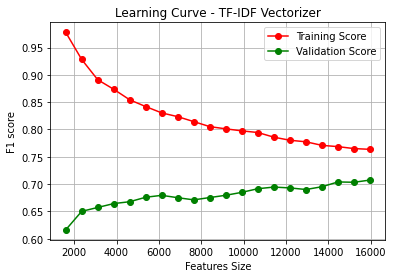

In [ ]:
learningCurve(softmax,tfidfTrain,tfidfTest,labelsTrain,labelsVal,"TF-IDF")

In [ ]:
# with preprocessing
softmaxTfidfAccuracyPreprocessing = accuracy_score(labelsVal,softmaxTfidfPredictedLabelPreprocessing)
print("-> With Preprocessing:")
print()
print(" Softmax accuracy Tdidf: %.2f%%" %(softmaxTfidfAccuracyPreprocessing*100))
print(classification_report(labelsVal,softmaxTfidfPredictedLabelPreprocessing))

-> With Preprocessing:

 Softmax accuracy Tdidf: 70.95%
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1065
           1       0.59      0.45      0.51       296
           2       0.68      0.69      0.69       921

    accuracy                           0.71      2282
   macro avg       0.68      0.65      0.66      2282
weighted avg       0.70      0.71      0.71      2282



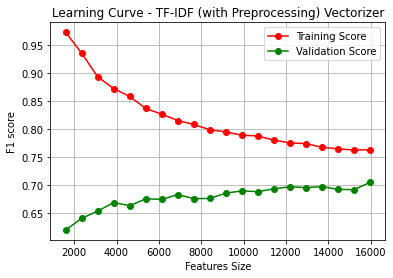

In [ ]:
learningCurve(softmax,tfidfTrainPreprocessing,tfidfTestPreprocessing,labelsTrain,labelsVal,"TF-IDF (with Preprocessing)")

### Hashing
--------------------------------------

In [ ]:
# without preprocessing
softmaxHashingAccuracy = accuracy_score(labelsVal,softmaxHashingPredictedLabel)
print(" Softmax accuracy Hashing: %.2f%%" %(softmaxHashingAccuracy*100))
print()
print(classification_report(labelsVal,softmaxHashingPredictedLabel))

 Softmax accuracy Hashing: 67.18%

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1065
           1       0.54      0.35      0.43       296
           2       0.64      0.68      0.66       921

    accuracy                           0.67      2282
   macro avg       0.63      0.59      0.61      2282
weighted avg       0.67      0.67      0.67      2282



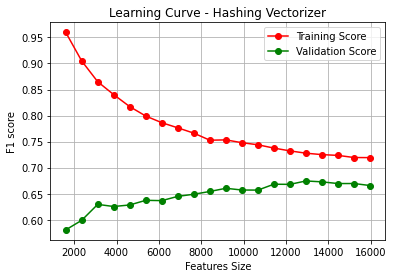

In [ ]:
learningCurve(softmax,hashingTrain,hashingTest,labelsTrain,labelsVal,"Hashing")

In [ ]:
# with preprocessing
softmaxHashingAccuracyPreprocessing = accuracy_score(labelsVal,softmaxHashingPredictedLabelPreprocessing)
print("-> With Preprocessing:")
print()
print(" Softmax accuracy Hashing: %.2f%%" %(softmaxHashingAccuracyPreprocessing*100))
print(classification_report(labelsVal,softmaxHashingPredictedLabelPreprocessing))

-> With Preprocessing:

 Softmax accuracy Hashing: 65.29%
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1065
           1       0.47      0.32      0.38       296
           2       0.62      0.65      0.63       921

    accuracy                           0.65      2282
   macro avg       0.60      0.57      0.58      2282
weighted avg       0.65      0.65      0.65      2282



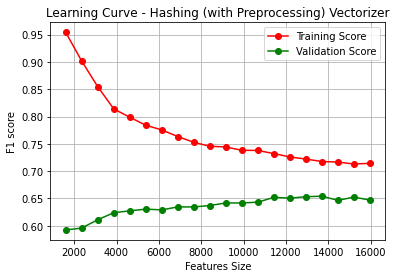

In [ ]:
learningCurve(softmax,hashingTrainPreprocessing,hashingTestPreprocessing,labelsTrain,labelsVal,"Hashing (with Preprocessing)")